# Abstract

Este conjunto de datos proporciona una descripción general completa de los diversos factores que afectan el desempeño de los estudiantes en los exámenes. Incluye información sobre los hábitos de estudio, la asistencia, la participación de los padres y otros aspectos que influyen en el éxito académico. No se eliminaron columnas ya que todas fueron utulizadas para el entrenamiento del modelo.

link:
https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data

Objetivo:
Hacer un analisis de los factores mas importantes en el aprendisaje de un estudiante.

Hipótesis principal:
En esta hipótesis se prevé que los estudiantes con mayor número de horas de estudio, acceso estable a internet y motivación alta tienen un mejor desempeño en las calificaciones de los exámenes, en comparación con aquellos que presentan menores valores en estas variables.

Hipótesis secundarias:

1. ¿Los estudiantes que tienen más horas estudiadas tienen mejor calificación?
2. Los estudiantes que participan en actividades extracurriculares equilibran su rendimiento académico y muestran calificaciones ligeramente mejores que quienes no participan, debido a habilidades organizativas y de gestión del tiempo.
3. ¿Los estudiantes de escuelas privadas obtienen calificaciones más altas en promedio que los de escuelas públicas?
4. ¿Una mayor distancia a la escuela afecta negativamente las calificaciones de los estudiantes?


In [281]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [370]:
dataFrame = pd.read_csv("DataSet/StudentPerformanceFactors.csv")
dataFramePlots = pd.read_csv("DataSet/StudentPerformanceFactors.csv")

Limpiando los datos, se remplaza con la mediana para no tender perdidas en las medidas y para los valores no numericos se utilizo la moda


In [ ]:
columns_null_data = dataFrame.columns[dataFrame.isnull().any()].tolist()

for i in columns_null_data:
    # mediana
    if dataFrame[i].dtype in ['float64', 'int64']:
        dataFrame[i] = dataFrame[i].fillna(dataFrame[i].median())
    else:
        # moda
        dataFrame[i] = dataFrame[i].fillna(dataFrame[i].mode()[0])

if dataFrame.isnull().sum().sum() > 0:
    print("ERROR -> Data frame with null values")
else:
    print("No missing values in the DataFrame.")
# Para data frame plots
   
columns_null_data = dataFramePlots.columns[dataFramePlots.isnull().any()].tolist()

for i in columns_null_data:

    if dataFramePlots[i].dtype in ['float64', 'int64']:
        dataFramePlots[i] = dataFramePlots[i].fillna(dataFramePlots[i].median())
    else:
        dataFramePlots[i] = dataFramePlots[i].fillna(dataFramePlots[i].mode()[0])

if dataFramePlots.isnull().sum().sum() > 0:
    print("ERROR -> Data frame with null values")
else:
    print("No missing values in the DataFrame.") 

No missing values in the DataFrame.
No missing values in the DataFrame.


# Graficos


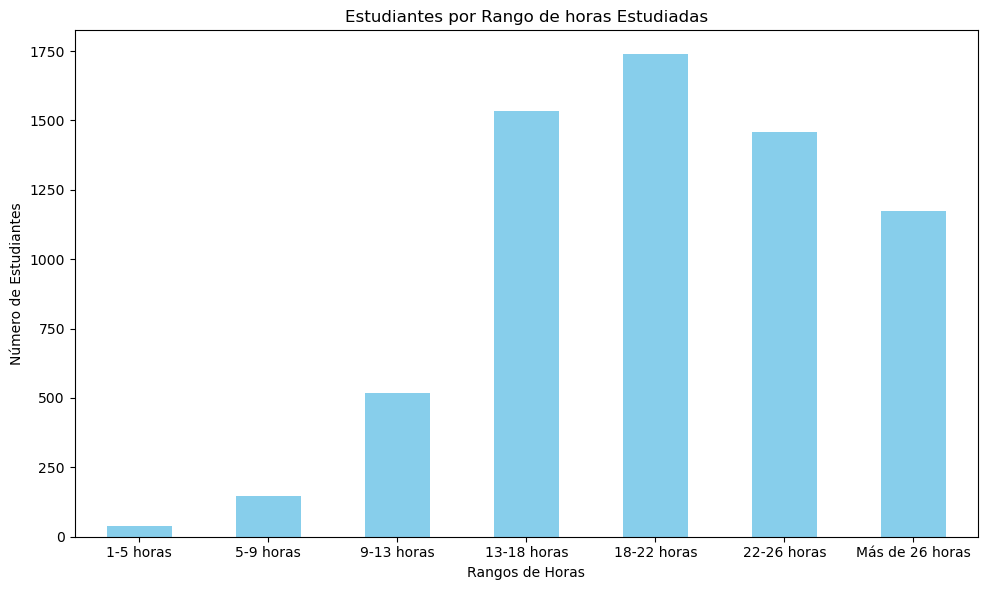

<Figure size 3000x600 with 0 Axes>

In [372]:

dataFramePlots['Range_hours'] = pd.cut(
    dataFramePlots['Hours_Studied'],
    bins=[0, 5, 9, 13,18,22,26, float('inf')],  # Límites de los rangos
    labels=['1-5 horas', '5-9 horas', '9-13 horas', '13-18 horas' ,'18-22 horas','22-26 horas' , 'Más de 26 horas'],  # Etiquetas
    right=False
)

count_range = dataFramePlots['Range_hours'].value_counts().sort_index()
count_range.plot(kind='bar', color='skyblue', legend =False, figsize=(10,6))
plt.title('Estudiantes por Rango de horas Estudiadas')
plt.xlabel('Rangos de Horas')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.figure(figsize=(30,6))
plt.show()

La mayoría de los estudiantes estudiaron entre 18 y 22 horas semanales


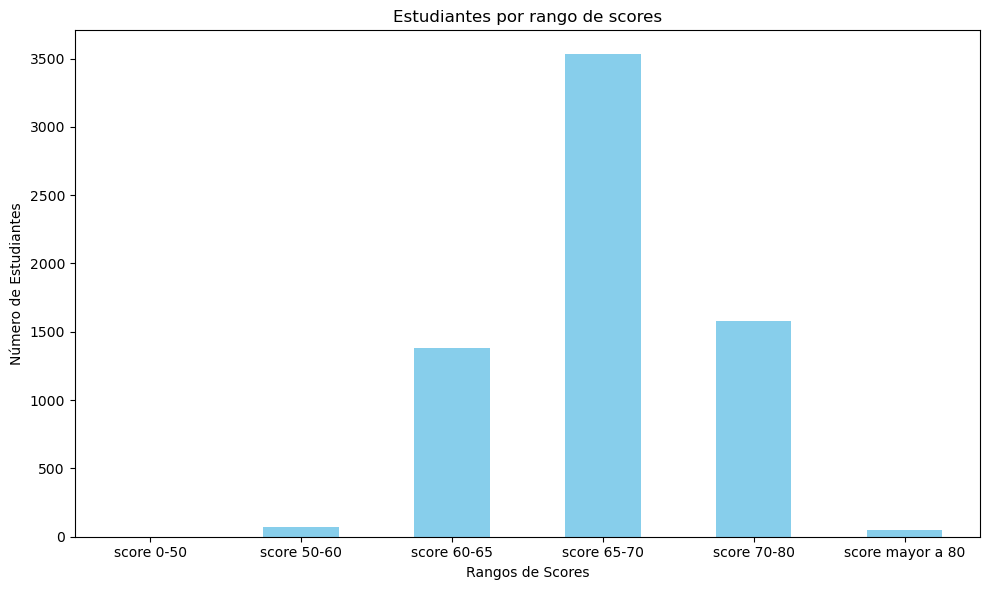

In [373]:

dataFramePlots['Range_scores'] = pd.cut(
    dataFramePlots["Exam_Score"],
    bins = [0,50, 60, 65, 70, 80, float('inf')],
    labels = ['score 0-50','score 50-60','score 60-65','score 65-70','score 70-80','score mayor a 80'],
    right = False
)

count_scores = dataFramePlots['Range_scores'].value_counts().sort_index()
count_scores.plot(kind='bar', color='skyblue', legend =False, figsize=(10,6))
plt.title('Estudiantes por rango de scores')
plt.xlabel('Rangos de Scores')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

La mayoría de los estudiantes tuvieron una calificación entre 65 y 70, posterior mente analizaremos a los estudiantes con calificación en el rango 50-60 y mayor que 80.


C:\Users\alvar\AppData\Local\Temp\ipykernel_3732\939425265.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scores_por_rango = dataFramePlots.groupby('Range_hours')['Exam_Score'].mean()


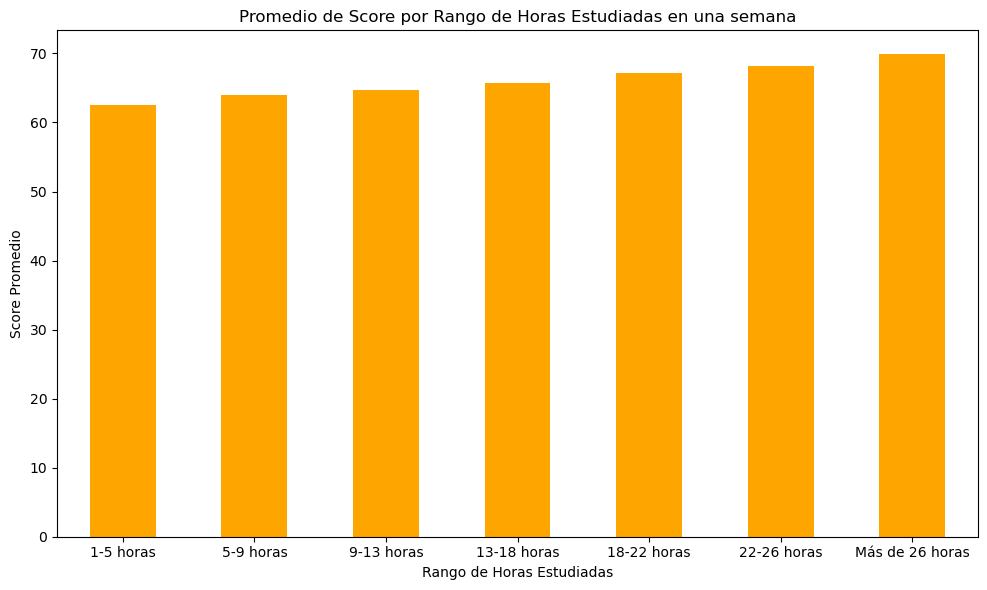

In [374]:
scores_por_rango = dataFramePlots.groupby('Range_hours')['Exam_Score'].mean()


scores_por_rango.plot(kind='bar', color='orange', figsize=(10, 6))

plt.title('Promedio de Score por Rango de Horas Estudiadas en una semana')
plt.xlabel('Rango de Horas Estudiadas')
plt.ylabel('Score Promedio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

En la grafica se puede observar que mientras mas horas estudiadas tenga el alumno, mayor es su calificación.


C:\Users\alvar\AppData\Local\Temp\ipykernel_3732\1367718535.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scores_attendance_by = dataFramePlots.groupby('Range_attendance')['Exam_Score'].mean()


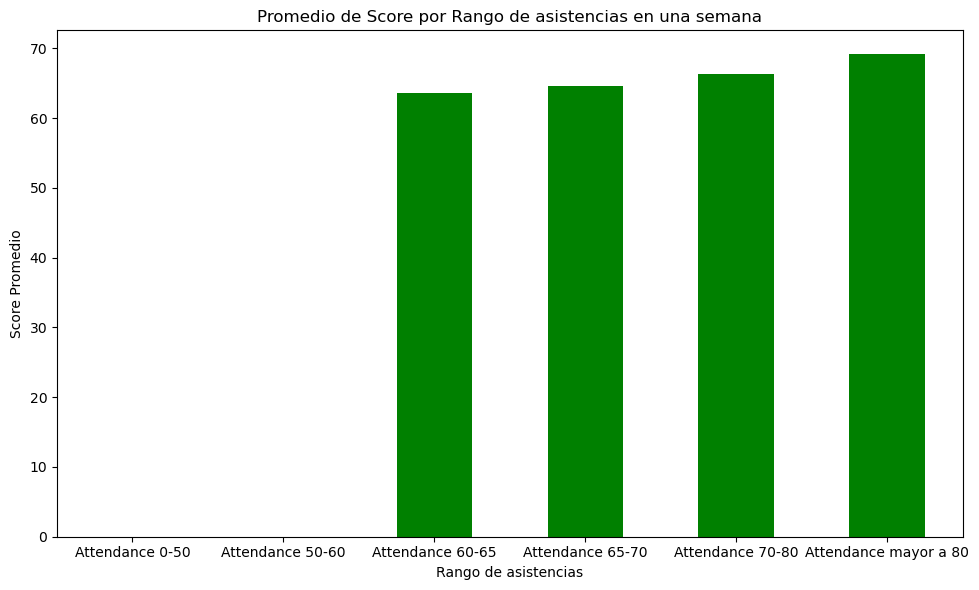

In [375]:

dataFramePlots['Range_attendance'] = pd.cut(
    dataFramePlots["Attendance"],
    bins = [0,50, 60, 65, 70, 80, float('inf')],
    labels = ['Attendance 0-50','Attendance 50-60','Attendance 60-65','Attendance 65-70','Attendance 70-80','Attendance mayor a 80'],
    right = False
)
scores_attendance_by = dataFramePlots.groupby('Range_attendance')['Exam_Score'].mean()
scores_attendance_by.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Promedio de Score por Rango de asistencias en una semana')
plt.xlabel('Rango de asistencias')
plt.ylabel('Score Promedio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

En este grafico tenemos el mismo comportamiento con la asistencia a clase, los que tuvieron una asistencia mayor a 80 su calificación fue mayor.


C:\Users\alvar\AppData\Local\Temp\ipykernel_3732\1687312574.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Distance_from_Home", y="Attendance", data=dataFramePlots, palette="Set2")


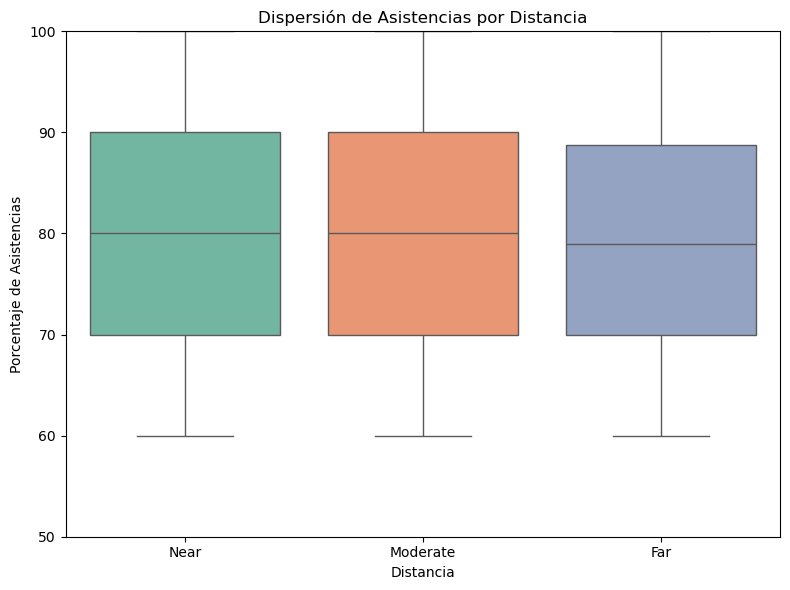

In [376]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Distance_from_Home", y="Attendance", data=dataFramePlots, palette="Set2")

plt.title('Dispersión de Asistencias por Distancia')
plt.xlabel('Distancia')
plt.ylabel('Porcentaje de Asistencias')
plt.ylim(50, 100)
plt.tight_layout()
plt.show()


Podemos observar que la distancia si influye en la asistencia a clase.


# EDA

## Contexto analitico

En este conjunto de datos se aplicará aprendizaje supervisado, dado que contamos con una variable objetivo claramente definida. El análisis se centra en predecir su valor y comprender cómo las distintas características influyen en ella, proporcionando así información clave para la toma de decisiones o la optimización de resultados.


Probando modelos


In [377]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = dataFrame.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    dataFrame[col] = label_encoders[col].fit_transform(dataFrame[col])


Como objectivo vamos a predecir si un estuduante arpobo o no el examen.
Dividiendo el puntaje en 5 partes
aprobado (puntaje >= 50)
reprobado (puntaje < 60)


In [378]:
conditions = [
    dataFrame['Exam_Score'] < 30,                                   
    (dataFrame['Exam_Score'] >= 30) & (dataFrame['Exam_Score'] < 45),  
    (dataFrame['Exam_Score'] >= 45) & (dataFrame['Exam_Score'] < 55), 
    (dataFrame['Exam_Score'] >= 55) & (dataFrame['Exam_Score'] < 65),  
    (dataFrame['Exam_Score'] >= 65) & (dataFrame['Exam_Score'] < 80),  
    dataFrame['Exam_Score'] >= 80                                   
]

values = [0, 1, 2, 3, 4, 5]

dataFrame['Exam_Score'] = np.select(conditions, values)

In [ ]:

X = dataFrame.drop(columns=["Exam_Score"])
y = dataFrame["Exam_Score"]


In [381]:
x_train, x_test , y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43, stratify=y)

Random Forest


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
random_forest = RandomForestClassifier(
    random_state=42
)
random_forest.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [383]:
predRand = random_forest.predict(x_test)
print(accuracy_score(y_test,predRand))

0.9228441754916793


El modelo de random forest nos da una mayor presicion al perdecir.


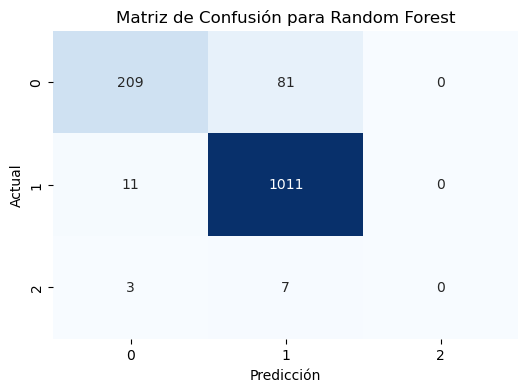

In [388]:
conf_matrix = confusion_matrix(y_test, predRand)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.title("Matriz de Confusión para Random Forest")
plt.show()

Se puede observar que tenemos un numero aceptable de evaluaciones correctas


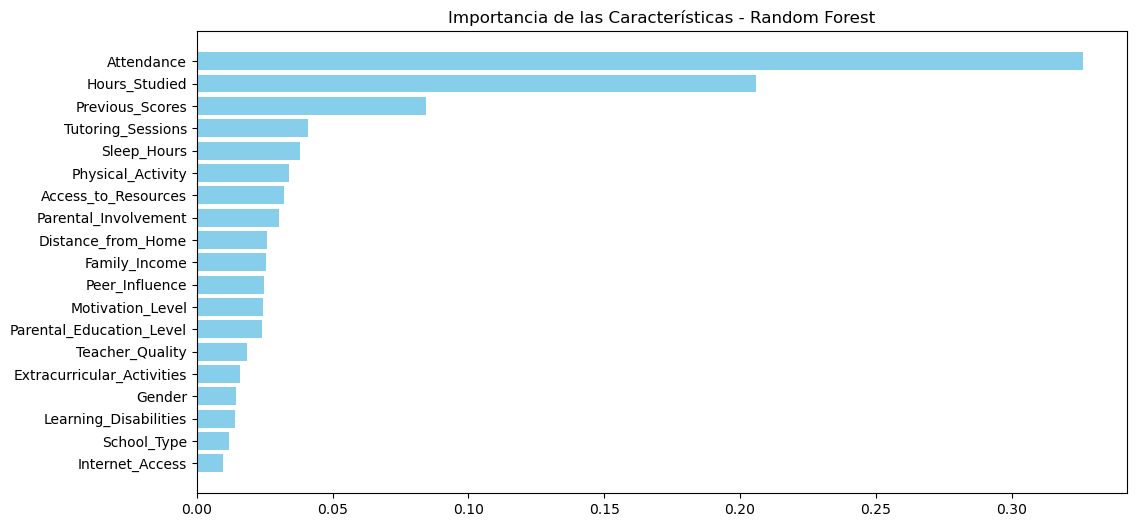

In [ ]:
# Importancia de cada característica
importances = random_forest.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title("Importancia de las Características - Random Forest")
plt.gca().invert_yaxis()
plt.show()

Podemos observar que de los factores mas importentes para una calificacion alta es la atencion y las horas estudiadas, esto mismo se pudo observar en una grafica anterior.


Desicion tree


In [322]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [323]:
y_pred = dt_model.predict(x_test)
print(accuracy_score(y_test,y_pred))


0.8623298033282905


# Conclusion


El estudio realizado resalta las características más influyentes en el desempeño académico de los estudiantes. Entre estas, la atención desempeña un papel fundamental, ya que es esencial para procesar, retener y aplicar el conocimiento de manera efectiva. Una atención sostenida permite a los estudiantes comprender mejor los conceptos impartidos en clase, lo que contribuye a un aprendizaje más profundo y significativo. Además, factores como un ambiente de estudio adecuado, la gestión del estrés y el sueño suficiente pueden potenciar la capacidad de atención, facilitando así un mejor desempeño escolar.

Por otro lado, el tiempo dedicado al estudio también se identifica como un elemento clave. Este tiempo no solo refleja el esfuerzo individual del estudiante, sino también la calidad de sus hábitos de aprendizaje. Es crucial que los profesores y las instituciones educativas fomenten prácticas de estudio efectivas, como la planificación del tiempo, el establecimiento de metas claras y el uso de técnicas activas de aprendizaje, como resúmenes, mapas conceptuales y ejercicios prácticos. Promover la dedicación al estudio de manera equilibrada, evitando la sobrecarga, puede ayudar a los estudiantes a alcanzar su máximo potencial académico.

En resumen, fomentar tanto la atención sostenida como la dedicación al estudio puede generar un impacto significativo en las calificaciones y en el desarrollo de habilidades académicas. Esto requiere un enfoque integral, que involucre a estudiantes, profesores y familias en la creación de un entorno propicio para el aprendizaje.
